In [5]:
# 导入20 Newsgroups corpus(约20000篇新闻)的单词出现次数为特征
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [6]:
# 选择4条新闻，下载训练集和测试集
categories=['talk.religion.misc', 'soc.religion.christian', 'sci.space','comp.graphics']
train=fetch_20newsgroups(subset='train',categories=categories)
test=fetch_20newsgroups(subset='test',categories=categories)
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [8]:
# 要应用于机器学习，先将每个字符串内容装换成数值向量，可以创建管道，将TF-IDF向量化方法与朴素贝叶斯分类器组合在一起。
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
model=make_pipeline(TfidfVectorizer(),MultinomialNB())
# 将模型应用到训练数据上，预测出每个测试数据的标签
model.fit(train.data,train.target)
# 预测测试数据结果的预测标签
labels=model.predict(test.data)

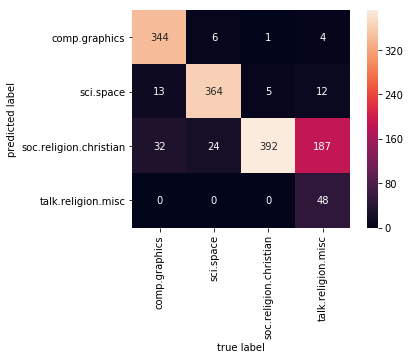

In [15]:
# 用混淆矩阵统计测试数据的真实标签与预测标签的结果
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
mat=confusion_matrix(test.target,labels)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False,xticklabels=train.target_names,yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()


In [22]:
# 定义函数快速返回字符串的预测结果
def predict_category(s,train=train,model=model):
    pred=model.predict([s])
    print(pred)
    return train.target_names[pred[0]]

In [19]:
predict_category('sending a payload to the ISS')

[1]


'sci.space'